In [1]:
%matplotlib notebook
import pandas as pd
import random
import numpy as np
import time
from matplotlib import pyplot as plt

In [48]:
tier_info = {
  "Bronze": [2, 0, 16, 0],
  "Silver": [2, -1,20, 0],
  "Gold": [1, -1, 24, 0],
  "Gold_1": [1, -1, 24, 18],
  "Platinum/Diamond": [1, -1, 28, 0]
}

def sim_games_till_next(curr_tier, winrate, trials):
    win_score, loss_score, needed_score, start_score = tier_info[curr_tier]
    results = []
    for x in range(trials):
        curr_score = start_score
        count = 0
        while(curr_score < needed_score):
            count += 1
            curr_score += win_score if(random.random() < winrate) else loss_score
            curr_score = max(curr_score, 0)
        results.append(count)
    return np.mean(results), np.std(results)

def info_to_graph(curr_tier, winrate):
    win_score, loss_score, needed_score, start_score = tier_info[curr_tier]
    ret = pd.DataFrame([[0 for i in range(needed_score + 1)] for i in range(needed_score + 1)])
    for i in range(needed_score + 1):
        if(i == needed_score):
            ret.loc[i, i] = 1
        else:
            ret.loc[i, min(i + win_score, needed_score)] += winrate
            ret.loc[i, max(i + loss_score, 0)] += 1 - winrate
    return ret

def p_max_for_k_games(curr_tier, winrate, k, start=0):
    tmat = info_to_graph(curr_tier, winrate).values
    curr_mat = np.eye(*tmat.shape)
    results = []
    for i in range(k + 1):
        results.append(curr_mat[start, -1])
        curr_mat = np.matmul(tmat, curr_mat)
        # print(curr_mat)
    return results

In [57]:
p_max_for_k_games('Silver', 0.01, 100000)[::5000]

[0.0,
 8.430851435609403e-17,
 1.687925703721623e-16,
 2.532766263882267e-16,
 3.3776068240428683e-16,
 4.2224473842034313e-16,
 5.067287944363912e-16,
 5.912128504524342e-16,
 6.756969064684772e-16,
 7.601809624845203e-16,
 8.4466501850056345e-16,
 9.291490745166222e-16,
 1.0136331305326406e-15,
 1.0981171865486589e-15,
 1.1826012425646774e-15,
 1.2670852985806958e-15,
 1.3515693545967096e-15,
 1.4360534106127084e-15,
 1.5205374666287072e-15,
 1.605021522644706e-15,
 1.6895055786607048e-15]

In [10]:
games, var = sim_games_till_next('Silver', 0.33, 10000)
games  += sim_games_till_next('Bronze', 0.33, 10000)[0]
games

258.71209999999996

In [11]:
games * 10 / 60/30

1.4372894444444444

In [9]:
start = time.time()
means = pd.DataFrame({"winrate": [x/100 for x in range(50,61)]})
stds = means.copy()
for tier in tier_info:
    # if(tier_info[tier][0] < 2):
    #     continue
    results = [sim_games_till_next(tier, wr, 1000) for wr in means['winrate']]
    means[tier] = [r[0] for r in results]
    stds[tier] = [r[1] for r in results]
means = means.set_index('winrate')
stds = stds.set_index('winrate')
print(time.time() - start)

3.281118631362915


In [18]:
means

,Bronze,Silver,Gold,Gold_1,Platinum/Diamond
winrate,,,,,
0.50,16.131,37.624,588.930,268.361,837.269
0.51,15.668,34.958,434.565,151.524,585.941
0.52,15.481,34.105,348.446,122.300,408.749
0.53,15.352,32.491,276.203,83.048,347.963
0.54,14.839,30.793,231.701,67.648,273.899
0.55,14.528,29.201,195.668,54.757,235.413
0.56,14.363,28.617,169.397,51.045,198.019
0.57,14.030,27.184,149.392,41.160,178.901
0.58,13.919,26.680,135.005,35.957,162.031


<IPython.core.display.Javascript object>


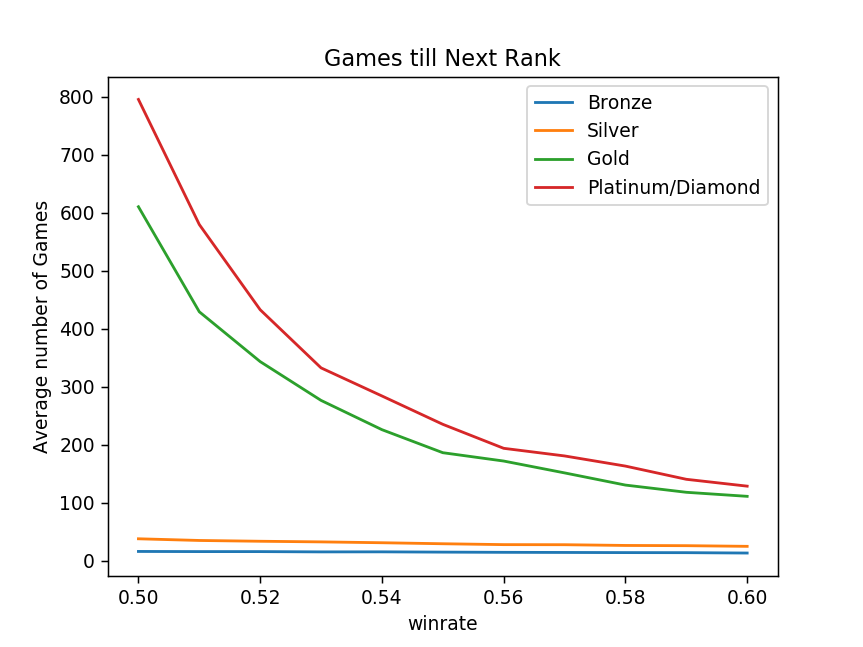

In [13]:
means.plot(y=[i for i in tier_info if(i != 'Gold_1')])

In [14]:
plt.title('Games till Next Rank')
plt.ylabel('Average number of Games')

Text(51.625,0.5,'Average number of Games')

In [15]:
plt.savefig('high_rank_50.png')

In [16]:
means

,Bronze,Silver,Gold,Gold_1,Platinum/Diamond
winrate,,,,,
0.50,15.810,37.648,610.399,260.139,795.522
0.51,15.567,34.750,429.218,173.200,579.717
0.52,15.546,33.383,343.281,131.747,432.753
0.53,15.055,32.305,276.360,88.953,332.464
0.54,15.131,30.832,225.883,75.735,284.012
0.55,14.648,29.090,186.151,58.427,235.119
0.56,14.283,27.573,171.760,51.030,193.716
0.57,14.072,27.424,151.317,43.918,180.569
0.58,13.835,26.149,130.300,37.369,163.057
